# PCLab#1 - Group 1 
### Petter, Oskar, Johannes

## Task #1 :Import the data and describe the sample

In [31]:
import pandas as pd 

In [32]:
df = pd.read_csv('data/Data_PCLab1_Stock.csv')

In [154]:
df.head()


AAPL         BA          T    MGM        AMZN         IBM  \
Date                                                                         
2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

                 TSLA        GOOG        sp500  
Date                                            
2012-01-12  28.250000  313.644379  1295.500000  
2012-01-13  22.790001  311.328064  1289.089966  
2012-01-17  26.600000  313.116364  1293.670044  
2012-01-18  26.809999  315.273285  1308.040039  
2012-01-19  26.760000  318.590851  1314.500000

• Check if data contains any null values

In [34]:
#check for any missing data... there is none, because 2159 non-null entries for 2159 entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [35]:
# Set "Date" as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

• Sort the stock data by date and print the number of stocks

In [36]:
#sort by date
df_sort = df.sort_index()
#number of stocks 
stocks = df_sort.columns[:-1]
num_stocks = len(stocks)
print(num_stocks)

8


• What is the average market value of the S&P500 ?

In [37]:
df['sp500'].mean()

2218.7495540592868

• Which stock or index has the minimum dispersion in dollar value ?

In [42]:
# We can take a look at the standard variation to get an idea
print(df.std().idxmin())
#take a look at the summary statistics to be convinced
df.describe()

T


AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

Answer: If we take the standard variation,  it is the Stock 'T'

• What is the maximum price for Amazon stock over the specified time period ?

In [39]:
AMZN_maxx = df['AMZN'].max()
AMZN_maxx

3225.0

## Task #2 : Plot the data

In [40]:
def plot_data(df, title = 'Absolute Prices of selected S&P 500 stocks'):
    fig = df.plot(figsize = (15,10) , xlabel= 'Time', ylabel = 'Stock Prizes', title = title )
    fig.show()
    return

AttributeError: 'Axes' object has no attribute 'show'

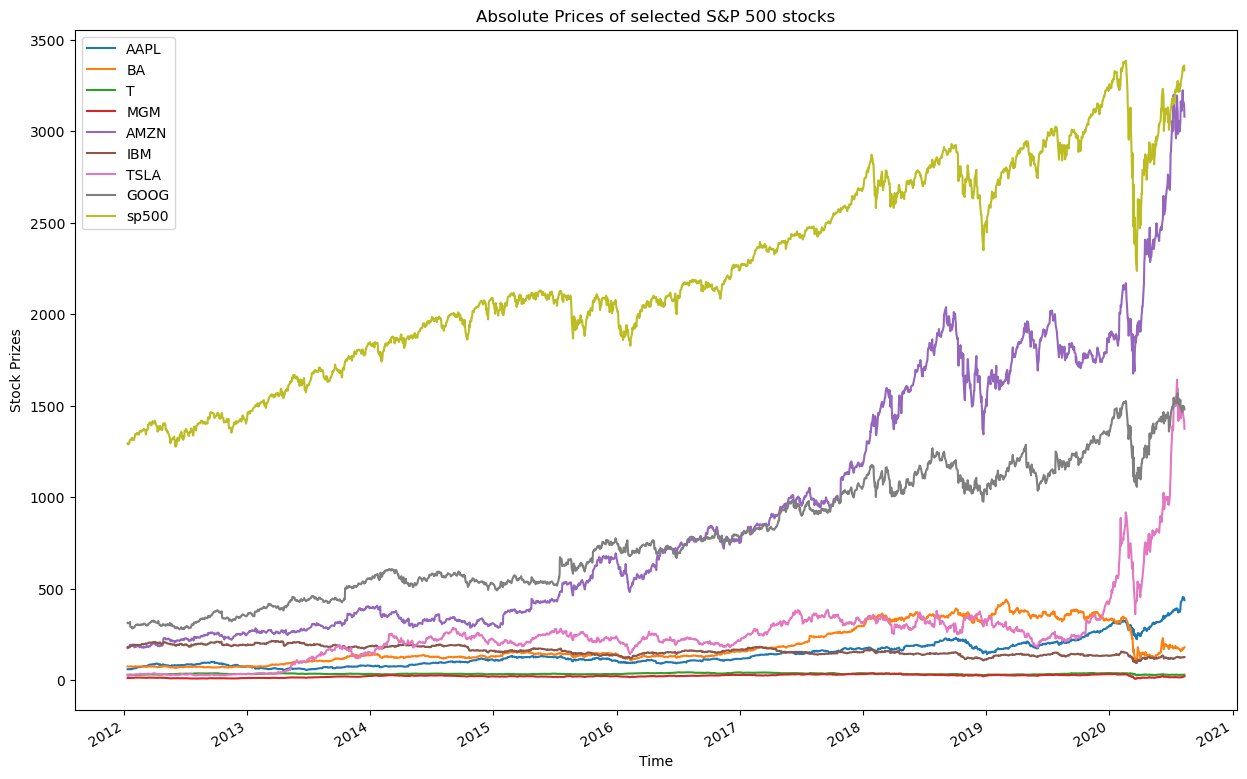

In [41]:
plot_data(df)

## Task 3 : Print out normalized (scaled) stock prices

In [43]:
def norm_price_startdate(df):
    df=df/df.iloc[0]*100
    return df

In [44]:
df_norm =norm_price_startdate(df)

AttributeError: 'Axes' object has no attribute 'show'

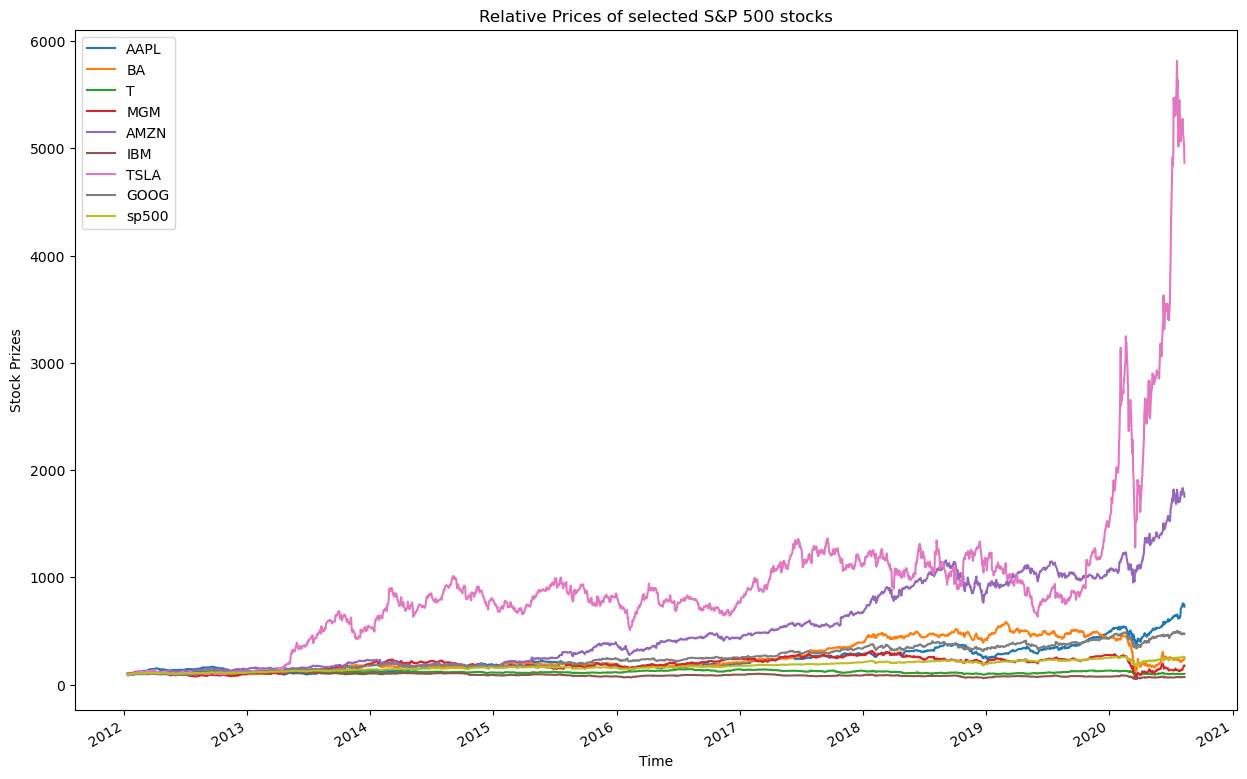

In [45]:
plot_data(df_norm, title = 'Relative Prices of selected S&P 500 stocks')

In [46]:
import plotly.express as px

def plot_ex(df, title, log_y=False): 
    fig = px.line(df, line_shape="spline",title= title, log_y=log_y, range_x = (df.index.min(), df.index.max()),   )
    fig.show()
    return 

In [47]:
plot_ex(df_norm, title = 'Interactive Chart of Relative Prices (in Log Scale) of selected S&P 500 stocks', log_y=True)


## Task #5 : Calculate stock returns (1)
• Define a function to calculate stocks daily returns (for all stocks) 
– Loop through each stock
– Loop through each row belonging to the stock 
• Plotit!

In [103]:
def calculate_daily_returns(df):
    # Create a new df as a copy
    returns_df = df.copy()
    #  first Loop through each stock 
    for stock in df.columns:
        # Initialize the first value as 0 (no past values)
        returns_df[stock].iloc[0] = 0
        # Loop through each day's price, starting from second
        for i in range(1, len(df)):
            # Calculate the daily return: (current day's price - previous day's price) / previous day's price
            previous_price = df[stock].iloc[i-1]
            current_price = df[stock].iloc[i]
            daily_return = (current_price - previous_price) / previous_price
            # Replace
            returns_df[stock].iloc[i] = daily_return
    return returns_df


In [104]:
df_dayly_return=calculate_daily_returns(df)

/var/folders/rl/glk77nxx70v4qglb24jl0byr0000gn/T/ipykernel_51872/444913610.py:7: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/rl/glk77nxx70v4qglb24jl0byr0000gn/T/ipykernel_51872/444913610.py:15: FutureWarning:

ChainedAssignmen

In [105]:
plot_ex(df_dayly_return, title='Dayly Return of sleected Stocks in S&P 500')

## Task #5 : Calculate stock returns (2)
• Calculate the correlations between daily returns
• Plot the correlation table as in heat-map


In [51]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_and_plot_correlation(returns_df):
    # Calculate the correlation matrix for daily returns
    corr_df = returns_df.corr()
    # Plotting the heatmap using matplotlib
    fig, ax = plt.subplots(figsize=(10, 8))
    # Create a heatmap using matshow()
    cax = ax.matshow(corr_df, cmap='coolwarm')
    # Add color bar
    fig.colorbar(cax)
    # Set axis labels and ticks
    ax.set_xticks(np.arange(len(corr_df.columns)))
    ax.set_yticks(np.arange(len(corr_df.columns)))
    ax.set_xticklabels(corr_df.columns, rotation=45, ha="left")
    ax.set_yticklabels(corr_df.columns)
    # Add annotations (correlation values) inside the heatmap
    for i in range(len(corr_df.columns)):
        for j in range(len(corr_df.columns)):
            plt.text(j, i, f'{corr_df.iloc[i, j]:.2f}', ha='center', va='center', color='black')
    # Set title
    plt.title('Correlation Heatmap of Stock Returns')
    
    # Show the heatmap
    plt.show()
    
    return corr_df

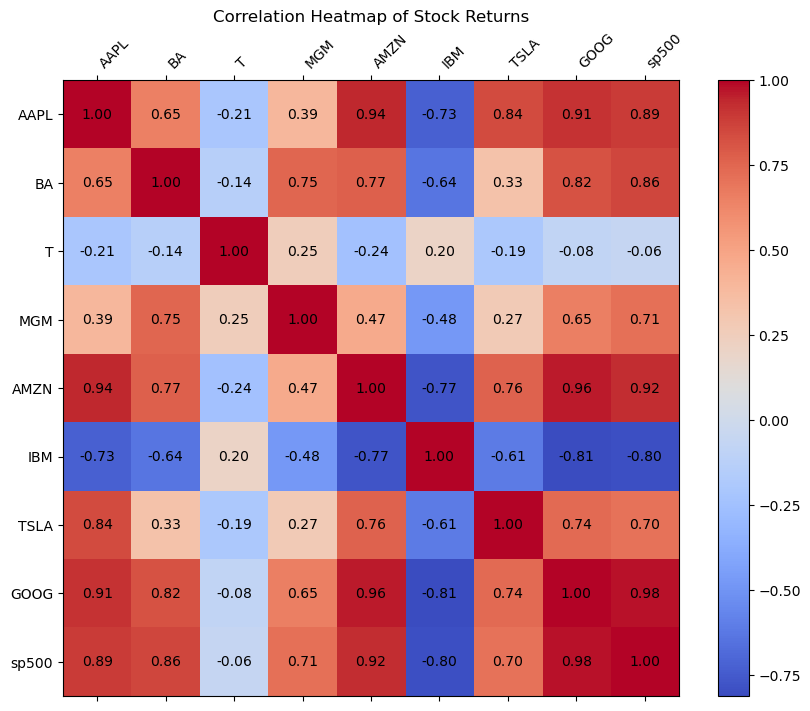

In [52]:
df_corr = calculate_and_plot_correlation(df)

• What are the top 2 stocks that are positively correlated with the S&P500 ?

In [53]:
df_corr['sp500'].sort_values(ascending=False)[1:4]

GOOG    0.978315
AMZN    0.923259
AAPL    0.892584
Name: sp500, dtype: float64

• What is the correlation between Amazon and Boeing ? Comment on your answer 

In [54]:
df_corr['AMZN']['BA']

0.7723001896119029

• What is the correlation between MGM and Boeing ? Comment on your answer


In [55]:
df_corr['MGM']['BA']

0.7467311905061372

## Task #5 : Calculate stock returns (3)
• Plot the histograms of daily returns and comment


In [87]:
histo_dayly_return = px.histogram(df_dayly_return, title= "Histogramm of dayly returns of Stocks", nbins=500 )
histo_dayly_return.show()

• Optional : Define a function to perform an interactive and fancy histograms plots using Plotly
– Plotly’s Python API contains a super powerful module known as figure factory module

In [85]:
import plotly.figure_factory as ff


# Function to create interactive and fancy histogram plots from a DataFrame
def histogram_plot(df,title = "Histogram" , bin_size=0.5, show_hist=True, show_curve=True, show_rug=False):
    """
    Plots an interactive and fancy histogram using Plotly's figure factory from a DataFrame.
    Parameters:
    - df: A pandas DataFrame where each column represents a dataset to plot as histograms.
    - bin_size: The size of each histogram bin (default is 0.2).
    - show_curve: Whether to show a kernel density estimate curve (default is True).
    - show_rug: Whether to show the rug plot below the histogram (default is False).
    - curve_color: Color of the density curve (default is 'blue').
    """
    # Extract data and labels from DataFrame
    data = [df[col] for col in df.columns]
    labels = df.columns.tolist()

    # Create the distribution plot
    fig = ff.create_distplot(
        data, 
        labels, 
        bin_size=bin_size, 
        show_hist=show_hist, 
        show_curve=show_curve, 
        show_rug=show_rug 
    )

    # Customize the layout
    fig.update_layout(
        title = title,
        xaxis_title="Value",
        yaxis_title="Density",
        legend_title="Variables",
    )
    # Show the plot
    fig.show()


In [89]:
histogram_plot(df_dayly_return ,title= "histogtam of dayly returns" , bin_size=0.2, show_curve=True, show_rug=True, show_hist=False)


## Task #6 : Portfolio weights
Simulation exercise
• Write a function that will :
– Simulate 1000 portfolios with random weights
– Compute the return, the variance and the Sharpe ratio of each portfolio – Return the maximum Sharpe ratio and its weights

In [122]:
import yfinance as yf

# Compute portfolio performance (return, volatility)
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Function to calculate risk-free rate for the period matching the stock data
def get_risk_free_rate_for_period(stock_data):
    """
    Fetch the historical risk-free rate (US 3-month Treasury Bill yield)
    over the same period as the stock data.
    """
    start_date = stock_data.index.min().strftime('%Y-%m-%d')
    end_date = stock_data.index.max().strftime('%Y-%m-%d')
    
    # Fetch 3-month US Treasury Bond Yield (^IRX) for the matching period
    treasury_data = yf.download("^IRX", start=start_date, end=end_date)
    
    if treasury_data.empty:
        raise ValueError("No treasury data available for the selected period.")
    
    # Convert annualized yield to daily yield (assuming 252 trading days per year)
    treasury_data['Daily Risk-Free Rate'] = treasury_data['Close'] / 100 / 252
    return treasury_data['Daily Risk-Free Rate'].mean()

# Simulate portfolios, calculate mean_returns, cov_matrix, and risk-free rate within the function
def simulate_portfolios(stock_data, num_portfolios=10000):
    """
    Simulate portfolios with random weights, calculate return, volatility, and Sharpe ratio.
    Returns the results and the maximum Sharpe ratio portfolio.
    
    Parameters:
    - stock_data: DataFrame containing stock prices with dates as index
    - num_portfolios: Number of portfolios to simulate (default: 1000)
    """
    # Calculate daily returns of the stocks
    daily_returns = stock_data.pct_change().dropna()
    # Calculate mean returns and covariance matrix
    mean_returns = daily_returns.mean()
    cov_matrix = daily_returns.cov()
    # Get risk-free rate for the period based on stock data's index range
    risk_free_rate = get_risk_free_rate_for_period(stock_data)
    print(f"Risk-Free Rate (Daily): {risk_free_rate:.6f}")
    
    num_assets = len(mean_returns)
    results = np.zeros((3, num_portfolios))  # Store return, volatility, Sharpe ratio
    weights_record = []

    for i in range(num_portfolios):
        # Generate random weights and normalize them
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)

        # Portfolio return and volatility
        portfolio_return, portfolio_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
        # Sharpe ratio calculation with risk-free rate
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        # Store the results
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio

    # Find the portfolio with the maximum Sharpe ratio
    max_sharpe_idx = np.argmax(results[2])
    max_sharpe_weights = weights_record[max_sharpe_idx]

    return results, weights_record, max_sharpe_idx, max_sharpe_weights, mean_returns, cov_matrix, risk_free_rate

# Example usage:
# Assuming you have a 'stock_data' DataFrame with your stock prices (indexed by date)
results, weights_record, max_sharpe_idx, max_sharpe_weights, mean_returns, cov_matrix, risk_free_rate = simulate_portfolios(df)

print(f"Maximum Sharpe Ratio Portfolio Weights: {max_sharpe_weights}")
print(f"Maximum Sharpe Ratio: {results[2, max_sharpe_idx]}")


[*********************100%***********************]  1 of 1 completed

Risk-Free Rate (Daily): 0.000026
Maximum Sharpe Ratio Portfolio Weights: [0.19414705 0.06753224 0.02688543 0.01349302 0.28195661 0.03551358
 0.23146483 0.13600081 0.01300643]
Maximum Sharpe Ratio: 0.08644926117128268


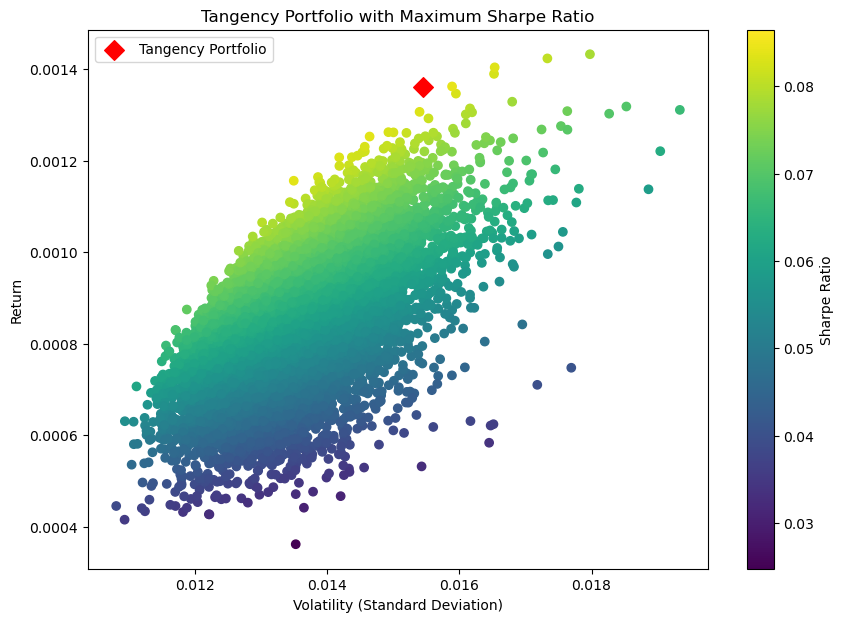

In [123]:
import matplotlib.pyplot as plt

# Function to plot the tangency portfolio
def plot_tangency_portfolio(results, max_sharpe_idx, weights_record):
    plt.figure(figsize=(10, 7))

    # Scatter plot of simulated portfolios
    plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
    plt.colorbar(label='Sharpe Ratio')

    # Highlight the maximum Sharpe ratio portfolio (tangency portfolio)
    plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], c='red', marker='D', s=100, label='Tangency Portfolio')

    plt.title('Tangency Portfolio with Maximum Sharpe Ratio')
    plt.xlabel('Volatility (Standard Deviation)')
    plt.ylabel('Return')
    plt.legend()
    plt.show()

# Example usage:
plot_tangency_portfolio(results, max_sharpe_idx, weights_record)


AttributeError: module 'matplotlib.pyplot' has no attribute 'range_x'

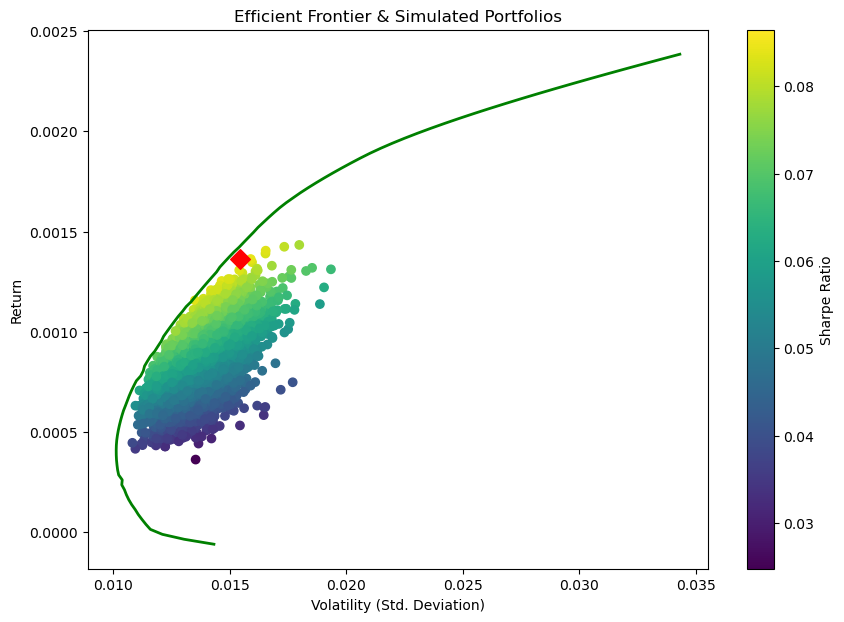

In [129]:
from scipy.optimize import minimize

# Minimize portfolio volatility for a given target return
def minimize_volatility(mean_returns, cov_matrix, target_return):
    num_assets = len(mean_returns)
    initial_weights = np.array([1. / num_assets] * num_assets)  # Initial guess (equal weights)
    
    # Constraints: weights sum to 1 and portfolio return equals target return
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Sum of weights must be 1
                   {'type': 'eq', 'fun': lambda w: np.dot(w, mean_returns) - target_return}]  # Return constraint
    
    # Bounds for each weight (between 0 and 1)
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    # Minimize portfolio volatility
    result = minimize(lambda w: portfolio_performance(w, mean_returns, cov_matrix)[1],
                      initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Efficient frontier: Find portfolios for various target returns
def calculate_efficient_frontier(mean_returns, cov_matrix, num_points=100):
    target_returns = np.linspace(min(mean_returns), max(mean_returns), num_points)
    frontier_volatility = []
    for target_return in target_returns:
        result = minimize_volatility(mean_returns, cov_matrix, target_return)
        portfolio_return, portfolio_volatility = portfolio_performance(result.x, mean_returns, cov_matrix)
        frontier_volatility.append(portfolio_volatility)
    return target_returns, frontier_volatility

# Plot the efficient frontier against the simulated portfolios
def plot_efficient_frontier(results, max_sharpe_idx, target_returns, efficient_volatilities):
    plt.figure(figsize=(10, 7))
    # Scatter plot of portfolios
    plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
    plt.colorbar(label='Sharpe Ratio')
    # Highlight the maximum Sharpe ratio portfolio
    plt.scatter(results[1, max_sharpe_idx], results[0, max_sharpe_idx], c='red', marker='D', s=100)
    # Plot the efficient frontier
    plt.plot(efficient_volatilities, target_returns, 'g-', linewidth=2, label='Efficient Frontier')
    plt.title('Efficient Frontier & Simulated Portfolios')
    plt.xlabel('Volatility (Std. Deviation)')
    plt.ylabel('Return')
    plt.legend()
    plt.show()
# Example usage:
target_returns, efficient_volatilities = calculate_efficient_frontier(mean_returns, cov_matrix)
plot_efficient_frontier(results, max_sharpe_idx, target_returns, efficient_volatilities)


• What are the weights of your tangency portfolio ? What would have been the performance of this portfolio over the sample period ? Plot it !


## Task #7 : Testing Portfolio Theory - Optional

• Re-run Task #6 but only on the first part of the sample (2012-2016)
• Find out what are the optimal weights for this period
• Simulate your optimal portfolio on the second part of the sample (2016-end)
– How does it perform?
– Plot the expected (measured over the 1st period) vs. the realized return and
volatility (over the second).


In [135]:
def run_task_4(stock_data):
    """
    Task 4: Optimized portfolio based on 2012-2016 data, and evaluate its performance on 2016-end period.
    
    - Find optimized portfolio based on 2012-2016 period
    - Compare its performance on 2016-end period to an equal-weight portfolio.
    """
    # Split data into two periods
    stock_data_first = stock_data.loc['2012':'2016']
    stock_data_second = stock_data.loc['2016':]

    # Simulate for the first period (2012-2016)
    results_first, weights_record_first, _, max_sharpe_weights_first, mean_returns_first, cov_matrix_first, _ = simulate_portfolios(stock_data_first)
    
    # Optimized portfolio performance expected in second period
    expected_return_opt, expected_volatility_opt = portfolio_performance(max_sharpe_weights_first, mean_returns_first, cov_matrix_first)
    
    # True performance of optimized portfolio in second period
    mean_returns_second = stock_data_second.pct_change().dropna().mean()
    cov_matrix_second = stock_data_second.pct_change().dropna().cov()
    true_return_opt, true_volatility_opt = portfolio_performance(max_sharpe_weights_first, mean_returns_second, cov_matrix_second)
    
    # Equal-weight portfolio
    equal_weights = np.ones(len(stock_data_first.columns)) / len(stock_data_first.columns)
    
    # Expected performance of equal-weight portfolio based on 2012-2016
    expected_return_eq, expected_volatility_eq = portfolio_performance(equal_weights, mean_returns_first, cov_matrix_first)
    
    # True performance of equal-weight portfolio in second period (2016-end)
    true_return_eq, true_volatility_eq = portfolio_performance(equal_weights, mean_returns_second, cov_matrix_second)
    
    # Output results
    print(f"--- Optimized Portfolio (2012-2016) ---")
    print(f"Expected Return (2016-End): {expected_return_opt:.4f}")
    print(f"Expected Volatility (2016-End): {expected_volatility_opt:.4f}")
    print(f"True Return (2016-End): {true_return_opt:.4f}")
    print(f"True Volatility (2016-End): {true_volatility_opt:.4f}")
    
    print(f"\n--- Equal Weights Portfolio ---")
    print(f"Expected Return (2016-End): {expected_return_eq:.4f}")
    print(f"Expected Volatility (2016-End): {expected_volatility_eq:.4f}")
    print(f"True Return (2016-End): {true_return_eq:.4f}")
    print(f"True Volatility (2016-End): {true_volatility_eq:.4f}")
    
    # Plot comparison of expected vs. realized returns for both portfolios
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.bar(['Optimized Expected', 'Optimized Realized', 'Equal Weight Expected', 'Equal Weight Realized'],
           [expected_return_opt, true_return_opt, expected_return_eq, true_return_eq], color=['blue', 'blue', 'green', 'green'])
    ax.set_ylabel('Return')
    ax.set_title('Expected vs Realized Returns (Optimized vs Equal Weight)')
    plt.show()


[*********************100%***********************]  1 of 1 completed


Risk-Free Rate (Daily): 0.000004
--- Optimized Portfolio (2012-2016) ---
Expected Return (2016-End): 0.0011
Expected Volatility (2016-End): 0.0121
True Return (2016-End): 0.0011
True Volatility (2016-End): 0.0159

--- Equal Weights Portfolio ---
Expected Return (2016-End): 0.0008
Expected Volatility (2016-End): 0.0103
True Return (2016-End): 0.0008
True Volatility (2016-End): 0.0153


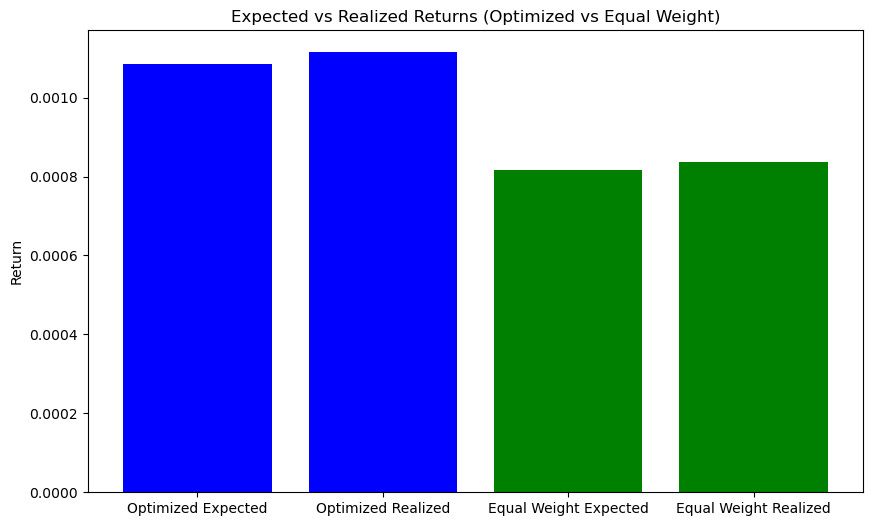

In [136]:
run_task_4(df)

In [157]:
def rebalance_yearly(stock_data):
    """
    Task 5: Rebalance portfolio yearly based on last year's data.
    
    - Optimized portfolio based on the previous year's performance
    - Compare its performance with an equal-weight portfolio for each year
    """
    years = stock_data.index.year.unique()
    yearly_results = []
    
    for year in years[1:]:  
        stock_data_year = stock_data.loc[str(year-1)]
        stock_data_next_year = stock_data.loc[str(year)]

        # Simulate for the current year to get the optimal portfolio based on that year
        results, weights_record, _, max_sharpe_weights, mean_returns_year, cov_matrix_year, _ = simulate_portfolios(stock_data_year)
        # Expected performance of optimized portfolio in the next year
        expected_return_opt, expected_volatility_opt = portfolio_performance(max_sharpe_weights, mean_returns_year, cov_matrix_year)
        # True performance of optimized portfolio in the next year
        mean_returns_next_year = stock_data_next_year.pct_change().dropna().mean()
        cov_matrix_next_year = stock_data_next_year.pct_change().dropna().cov()
        true_return_opt, true_volatility_opt = portfolio_performance(max_sharpe_weights, mean_returns_next_year, cov_matrix_next_year)
        # Equal weight portfolio
        equal_weights = np.ones(len(stock_data_year.columns)) / len(stock_data_year.columns)
        # Expected performance of equal-weight portfolio based on current year
        expected_return_eq, expected_volatility_eq = portfolio_performance(equal_weights, mean_returns_year, cov_matrix_year)
        # True performance of equal-weight portfolio in the next year
        true_return_eq, true_volatility_eq = portfolio_performance(equal_weights, mean_returns_next_year, cov_matrix_next_year)
        # Store the results for comparison
        yearly_results.append({
            'Year': year ,
            'Expected Return Opt': expected_return_opt,
            'Expected Volatility Opt': expected_volatility_opt,
            'True Return Opt': true_return_opt,
            'True Volatility Opt': true_volatility_opt,
            'Expected Return Eq': expected_return_eq,
            'Expected Volatility Eq': expected_volatility_eq,
            'True Return Eq': true_return_eq,
            'True Volatility Eq': true_volatility_eq
        })

        # Output for each year
        print(f"\n--- Year {year } ---")
        print(f"Expected Return Optimized Portfolio: {expected_return_opt:.4f}")
        print(f"Expected Volatility Optimized Portfolio: {expected_volatility_opt:.4f}")
        print(f"True Return Optimized Portfolio: {true_return_opt:.4f}")
        print(f"True Volatility Optimized Portfolio: {true_volatility_opt:.4f}")
        
        print(f"Expected Return Equal Weight Portfolio: {expected_return_eq:.4f}")
        print(f"Expected Volatility Equal Weight Portfolio: {expected_volatility_eq:.4f}")
        print(f"True Return Equal Weight Portfolio: {true_return_eq:.4f}")
        print(f"True Volatility Equal Weight Portfolio: {true_volatility_eq:.4f}")

    # Plot comparison of expected vs realized returns and volatilities
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))
    
    years_range = [year for year in years[1:]]
    
    # Return comparison
    ax[0].plot(years_range, [result['Expected Return Opt'] for result in yearly_results], label='Optimized Expected', marker='o')
    ax[0].plot(years_range, [result['True Return Opt'] for result in yearly_results], label='Optimized Realized', marker='x')
    ax[0].plot(years_range, [result['Expected Return Eq'] for result in yearly_results], label='Equal Weight Expected', marker='o')
    ax[0].plot(years_range, [result['True Return Eq'] for result in yearly_results], label='Equal Weight Realized', marker='x')
    ax[0].set_ylabel('Return')
    ax[0].set_title('Expected vs Realized Returns (Optimized vs Equal Weight)')
    ax[0].legend()
    
    # Volatility comparison
    ax[1].plot(years_range, [result['Expected Volatility Opt'] for result in yearly_results], label='Optimized Expected', marker='o')
    ax[1].plot(years_range, [result['True Volatility Opt'] for result in yearly_results], label='Optimized Realized', marker='x')
    ax[1].plot(years_range, [result['Expected Volatility Eq'] for result in yearly_results], label='Equal Weight Expected', marker='o')
    ax[1].plot(years_range, [result['True Volatility Eq'] for result in yearly_results], label='Equal Weight Realized', marker='x')
    ax[1].set_ylabel('Volatility')
    ax[1].set_title('Expected vs Realized Volatility (Optimized vs Equal Weight)')
    ax[1].legend()
    
    plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Risk-Free Rate (Daily): 0.000003

--- Year 2013 ---
Expected Return Optimized Portfolio: 0.0010
Expected Volatility Optimized Portfolio: 0.0109
True Return Optimized Portfolio: 0.0014
True Volatility Optimized Portfolio: 0.0090
Expected Return Equal Weight Portfolio: 0.0007
Expected Volatility Equal Weight Portfolio: 0.0105
True Return Equal Weight Portfolio: 0.0019
True Volatility Equal Weight Portfolio: 0.0089
Risk-Free Rate (Daily): 0.000002


[*********************100%***********************]  1 of 1 completed



--- Year 2014 ---
Expected Return Optimized Portfolio: 0.0028
Expected Volatility Optimized Portfolio: 0.0115
True Return Optimized Portfolio: 0.0001
True Volatility Optimized Portfolio: 0.0126
Expected Return Equal Weight Portfolio: 0.0019
Expected Volatility Equal Weight Portfolio: 0.0089
True Return Equal Weight Portfolio: 0.0002
True Volatility Equal Weight Portfolio: 0.0098
Risk-Free Rate (Daily): 0.000001

--- Year 2015 ---
Expected Return Optimized Portfolio: 0.0009
Expected Volatility Optimized Portfolio: 0.0117
True Return Optimized Portfolio: 0.0006
True Volatility Optimized Portfolio: 0.0128
Expected Return Equal Weight Portfolio: 0.0002
Expected Volatility Equal Weight Portfolio: 0.0098
True Return Equal Weight Portfolio: 0.0007
True Volatility Equal Weight Portfolio: 0.0118


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Risk-Free Rate (Daily): 0.000002

--- Year 2016 ---
Expected Return Optimized Portfolio: 0.0015
Expected Volatility Optimized Portfolio: 0.0126
True Return Optimized Portfolio: 0.0007
True Volatility Optimized Portfolio: 0.0108
Expected Return Equal Weight Portfolio: 0.0007
Expected Volatility Equal Weight Portfolio: 0.0118
True Return Equal Weight Portfolio: 0.0006
True Volatility Equal Weight Portfolio: 0.0098
Risk-Free Rate (Daily): 0.000012


[*********************100%***********************]  1 of 1 completed



--- Year 2017 ---
Expected Return Optimized Portfolio: 0.0007
Expected Volatility Optimized Portfolio: 0.0079
True Return Optimized Portfolio: 0.0004
True Volatility Optimized Portfolio: 0.0067
Expected Return Equal Weight Portfolio: 0.0006
Expected Volatility Equal Weight Portfolio: 0.0098
True Return Equal Weight Portfolio: 0.0011
True Volatility Equal Weight Portfolio: 0.0065
Risk-Free Rate (Daily): 0.000037


[*********************100%***********************]  1 of 1 completed



--- Year 2018 ---
Expected Return Optimized Portfolio: 0.0018
Expected Volatility Optimized Portfolio: 0.0071
True Return Optimized Portfolio: 0.0002
True Volatility Optimized Portfolio: 0.0154
Expected Return Equal Weight Portfolio: 0.0011
Expected Volatility Equal Weight Portfolio: 0.0065
True Return Equal Weight Portfolio: -0.0001
True Volatility Equal Weight Portfolio: 0.0142
Risk-Free Rate (Daily): 0.000076


[*********************100%***********************]  1 of 1 completed


--- Year 2019 ---
Expected Return Optimized Portfolio: 0.0006
Expected Volatility Optimized Portfolio: 0.0205
True Return Optimized Portfolio: 0.0011
True Volatility Optimized Portfolio: 0.0151
Expected Return Equal Weight Portfolio: -0.0001
Expected Volatility Equal Weight Portfolio: 0.0142
True Return Equal Weight Portfolio: 0.0012
True Volatility Equal Weight Portfolio: 0.0104
Risk-Free Rate (Daily): 0.000081



--- Year 2020 ---
Expected Return Optimized Portfolio: 0.0016
Expected Volatility Optimized Portfolio: 0.0104
True Return Optimized Portfolio: 0.0014
True Volatility Optimized Portfolio: 0.0290
Expected Return Equal Weight Portfolio: 0.0012
Expected Volatility Equal Weight Portfolio: 0.0104
True Return Equal Weight Portfolio: 0.0015
True Volatility Equal Weight Portfolio: 0.0322


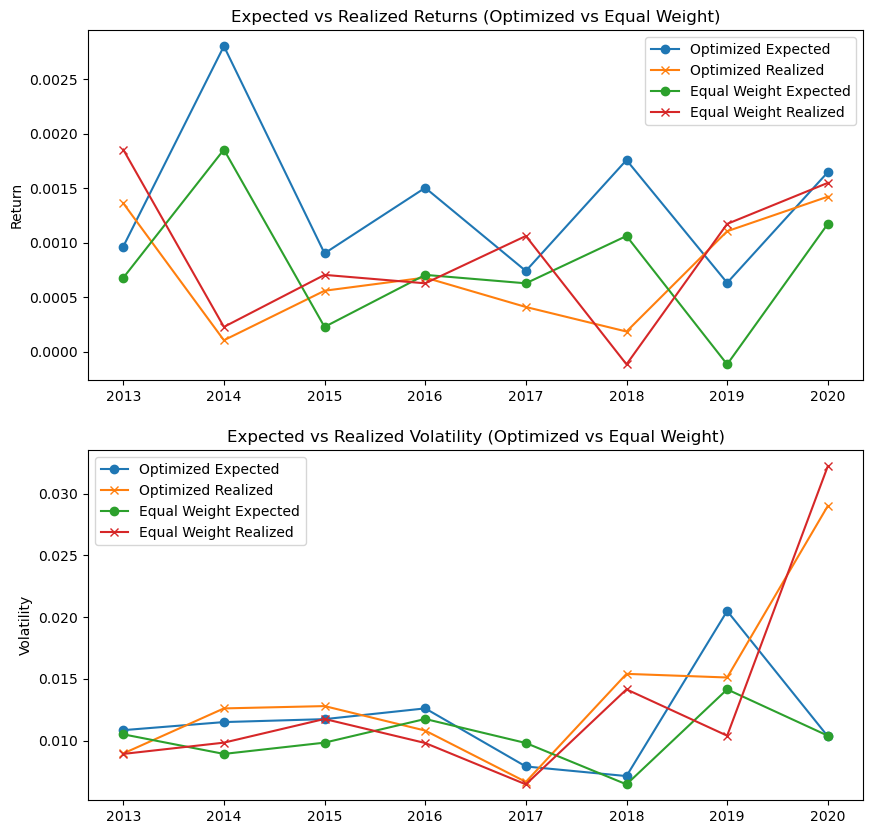

In [158]:
rebalance_yearly(df)
